# Trabalho IA - Análise do Mercado Financeiro

Este trabalho apresenta uma aplicação de redes neurais LSTM para previsão de preços de ações.

In [ ]:
%pip install yfinance
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install keras
%pip install tensorflow

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Objetivo

O objetivo deste trabalho é disseminar o conhecimento sobre a aplicação de modelos de inteligência artificial para que investidores de modo geral consigam mitigar com técnicas modernas os riscos atrelados ao investimento no mercado de renda variável. Isso promove a redução das desigualdades sociais, uma vez que esse conhecimento possibilita ao interessado uma tomada de decisão mais consciente, independente e segura. Por outro lado, os discentes terão a oportunidade de aprimorar a sua formação em aprendizado de máquina com aplicação em uma área que demanda cada vez mais profissionais com essas habilidades.

## Importação do DATASET por meio do Yahoo Finance

Utilizaremos a biblioteca yfinance para obter dados históricos das ações da Apple (AAPL).

In [ ]:
import yfinance as yf


tickerSymbol = 'AAPL'


tickerData = yf.Ticker(tickerSymbol)


tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-12-31')
data = tickerDf["Close"]

print(tickerDf)

                                 Open        High         Low       Close  \
Date                                                                        
2010-01-04 00:00:00-05:00    6.422877    6.455077    6.391279    6.440331   
2010-01-05 00:00:00-05:00    6.458087    6.487879    6.417460    6.451466   
2010-01-06 00:00:00-05:00    6.451466    6.477046    6.342226    6.348847   
2010-01-07 00:00:00-05:00    6.372319    6.379843    6.291067    6.337110   
2010-01-08 00:00:00-05:00    6.328682    6.379842    6.291367    6.379240   
...                               ...         ...         ...         ...   
2020-12-23 00:00:00-05:00  129.091392  129.355113  127.743430  127.919258   
2020-12-24 00:00:00-05:00  128.270906  130.361217  128.056013  128.905807   
2020-12-28 00:00:00-05:00  130.878899  134.151107  130.410033  133.516205   
2020-12-29 00:00:00-05:00  134.844620  135.567429  131.220756  131.738449   
2020-12-30 00:00:00-05:00  132.431956  132.832440  130.302566  130.615143   

## Análise Exploratória

Nesta seção, realizaremos uma análise completa dos dados para entender suas características principais, identificar padrões e possíveis anomalias.

In [ ]:
# Analise Exploratoria completa do tickerDf
print(tickerDf.head())  # Primeiras linhas
print(tickerDf.info())  # Informações sobre colunas e tipos de dados


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.422877  6.455077  6.391279  6.440331  493729600   
2010-01-05 00:00:00-05:00  6.458087  6.487879  6.417460  6.451466  601904800   
2010-01-06 00:00:00-05:00  6.451466  6.477046  6.342226  6.348847  552160000   
2010-01-07 00:00:00-05:00  6.372319  6.379843  6.291067  6.337110  477131200   
2010-01-08 00:00:00-05:00  6.328682  6.379842  6.291367  6.379240  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2

In [ ]:
print(tickerDf.describe())

              Open         High          Low        Close        Volume  \
count  2768.000000  2768.000000  2768.000000  2768.000000  2.768000e+03   
mean     31.325096    31.652142    30.998978    31.338709  2.866839e+08   
std      24.387906    24.719046    24.051933    24.400926  2.289595e+08   
min       5.789104     5.898344     5.725307     5.779475  4.544800e+07   
25%      15.065548    15.235431    14.953084    15.107672  1.211411e+08   
50%      24.460684    24.713184    24.178144    24.396259  2.030340e+08   
75%      40.666157    41.013688    40.411685    40.686817  3.890908e+08   
max     134.844620   135.567429   131.220756   133.516205  1.880998e+09   

         Dividends  Stock Splits  
count  2768.000000   2768.000000  
mean      0.001815      0.003974  
std       0.016747      0.153217  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       0.205000      7.000000  


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


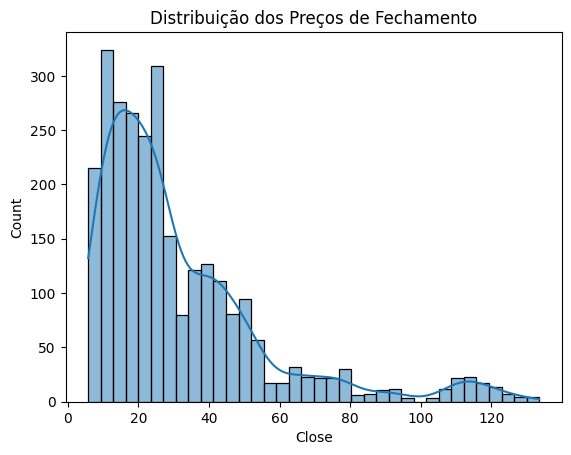

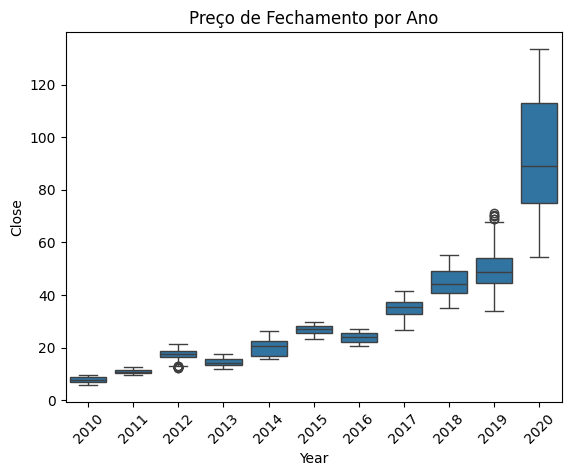

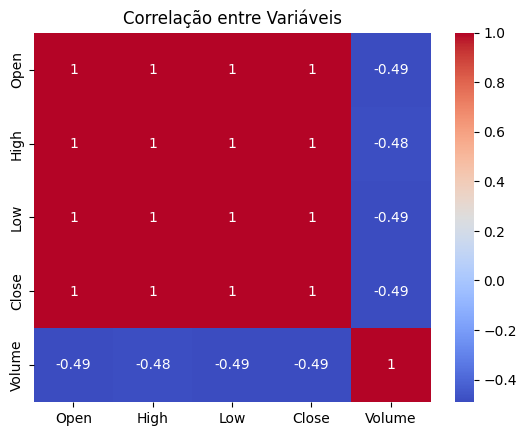

In [ ]:
# Visualização de dados
print(tickerDf.isnull().sum())

# Histograma do preço de fechamento
sns.histplot(tickerDf['Close'], kde=True)  # Usando coluna 'Close' em vez de 'coluna_numerica'
plt.title('Distribuição dos Preços de Fechamento')
plt.show()

# Extraindo ano para análise categórica
tickerDf['Year'] = tickerDf.index.year
sns.boxplot(x=tickerDf['Year'], y=tickerDf['Close'])  # Boxplot por ano
plt.title('Preço de Fechamento por Ano')
plt.xticks(rotation=45)
plt.show()

# Matriz de correlação apenas com colunas numéricas
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
corr = tickerDf[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

### Visualização da Série Temporal

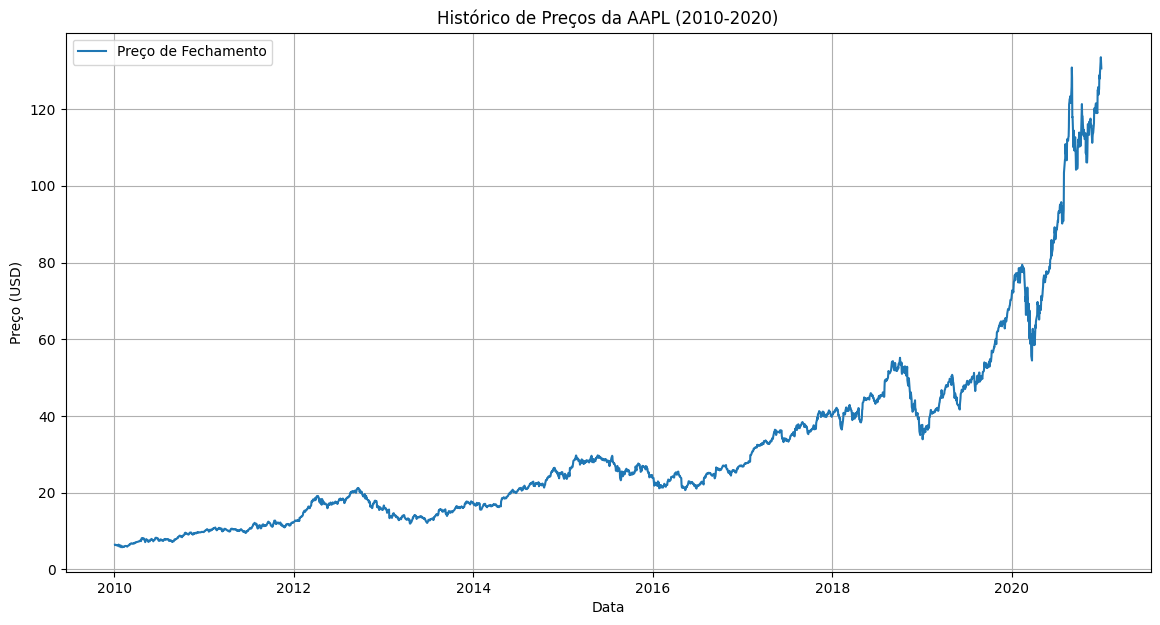

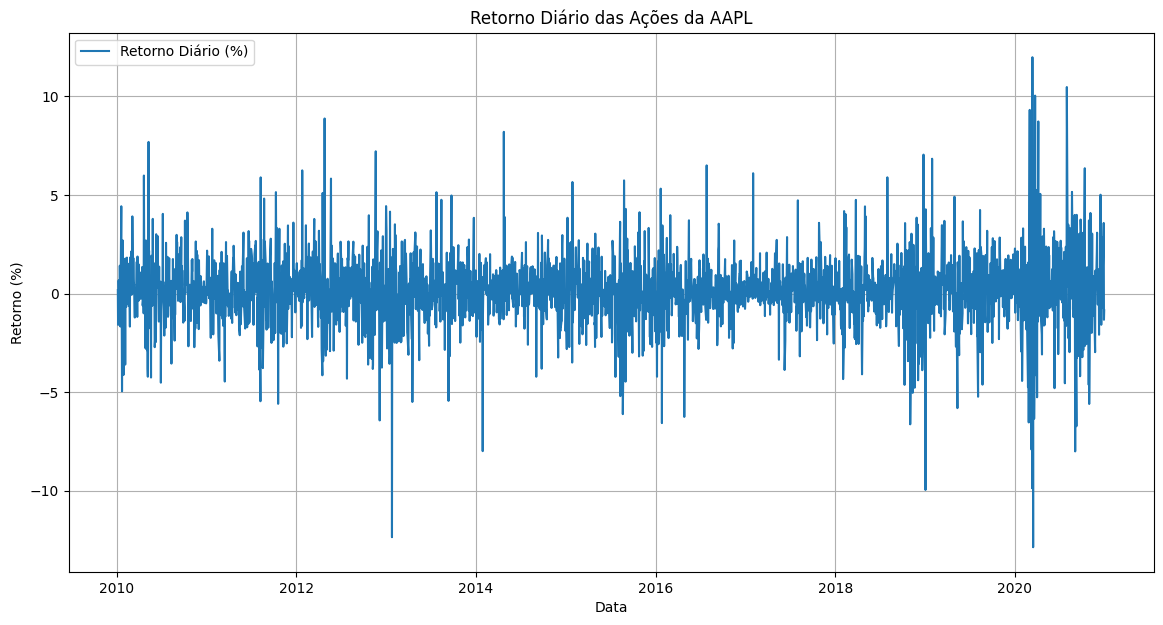

In [ ]:
# Visualização da série temporal completa
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['Close'], label='Preço de Fechamento')
plt.title('Histórico de Preços da AAPL (2010-2020)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.grid(True)
plt.legend()
plt.show()

# Visualização da variação percentual diária
returns = tickerDf['Close'].pct_change() * 100
plt.figure(figsize=(14, 7))
plt.plot(returns, label='Retorno Diário (%)')
plt.title('Retorno Diário das Ações da AAPL')
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.grid(True)
plt.legend()
plt.show()

### Análise de Médias Móveis

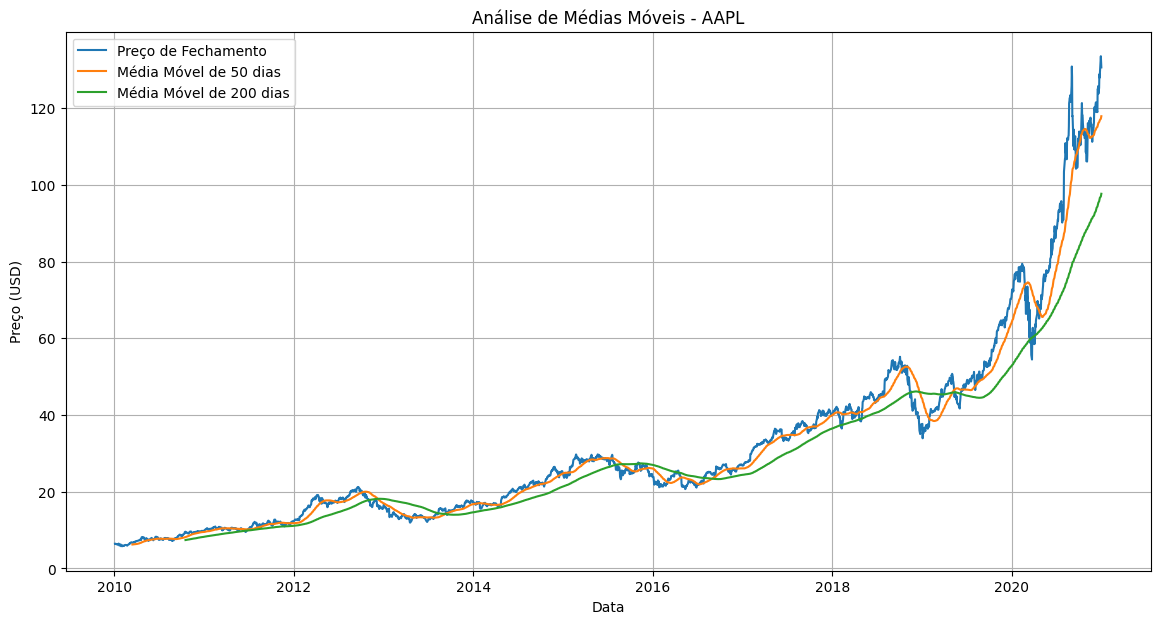

In [ ]:
# Cálculo das médias móveis
tickerDf['MA50'] = tickerDf['Close'].rolling(window=50).mean()
tickerDf['MA200'] = tickerDf['Close'].rolling(window=200).mean()

# Plotagem das médias móveis
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['Close'], label='Preço de Fechamento')
plt.plot(tickerDf['MA50'], label='Média Móvel de 50 dias')
plt.plot(tickerDf['MA200'], label='Média Móvel de 200 dias')
plt.title('Análise de Médias Móveis - AAPL')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Pré-processamento dos Dados

Preparação dos dados para alimentar o modelo LSTM.

In [ ]:
# Funções auxiliares para preparar os dados e avaliar os modelos
import numpy as np
from sklearn.metrics import mean_squared_error

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Função para preparar os dados
def prepare_data(series, sequence_length=60):
    series = series.dropna()
    data = series.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    X, y = create_sequences(normalized_data, sequence_length)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y, scaler


In [ ]:
# Preparação dos dados
X, Y, scaler = prepare_data(tickerDf['Close'])

# Split the data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = Y[:split], Y[split:]

## Metodologia e Resultados Esperados

Nesta seção, apresentamos a abordagem comparativa que será utilizada para avaliar o desempenho de três modelos de redes neurais avançadas (LSTM padrão, LSTM bidirecional e GRU) aplicados a três diferentes ações: Apple (AAPL), Microsoft (MSFT) e Google (GOOGL).

A metodologia compreende as seguintes etapas:

1. Download dos dados históricos (2010-2020) para cada ação, utilizando a biblioteca yfinance.
2. Normalização e preparação dos dados com a criação de sequências para alimentar os modelos (60 dias de histórico para prever o próximo dia).
3. Implementação de três arquiteturas:
   - LSTM padrão com duas camadas intercaladas por dropout;
   - LSTM bidirecional para capturar dependências em ambas as direções;
   - GRU, que possui estrutura simplificada e rapidez no treinamento.
4. Treinamento dos modelos para cada conjunto de dados de ação e execução de testes.
5. Avaliação dos modelos por meio das métricas RMSE e MAPE, com a geração de gráficos individuais de predição.
6. Consolidação dos resultados em tabelas comparativas e gráficos de barras para identificar os modelos com melhor desempenho.

Os resultados finais serão analisados para concluir qual combinação ação/modelo melhor captura as dinâmicas temporais do mercado financeiro.